In [1]:
# Import modules

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

np.random.seed(1)

In [2]:
# Prepare the training data

x_ori = np.array([
                  [0,1,1,0,0,0,0,0,0], 
                  [0,0,1,1,0,0,0,0,0],
                  [0,0,0,0,0,1,1,0,0],
                  [0,0,0,0,0,0,1,1,0]
                 ]
                ) 

labels4train = np.random.choice(np.arange(x_ori.shape[0]), size=10000, replace=True)

x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])

In [3]:
# Activation Function

def y_of_x(x):
    return 0.5*(x + np.abs(x))

# Training input weights

def update_w(x, w, limit=False, ltd=True, mature=True, compet=True, rate=0.1):
    
    w_local = np.copy(w)
    
    for idx in range(x.shape[0]):
        
        xt = x[idx]

        noise = np.heaviside(0.1 - np.random.random_sample(w_local.shape[0]), 0)
        
        x_in = xt
        x_in = 0.5*(x_in + np.absolute(x_in))
        
        y_in = np.matmul(w_local, x_in.transpose()) + noise * 0.01
                
        y = y_of_x(y_in)
        
        if ltd:

            delta_w = np.outer(y, xt - 0.25)

            w_local += rate * delta_w

            for i in range(w_local.shape[0]):
                if np.max(w_local[i]) >= 1.0:
                    w_local[i] /= np.max(w_local[i])
        
        elif limit:

            delta_w = np.outer(y, xt)
            
            if mature:

                for i in range(w_local.shape[0]):
                    if np.sum(w_local[i]) >= 0.1:
                        delta_w[i] = np.zeros_like(delta_w[i])

            if compet:
                
                for i in range(delta_w.shape[1]):
                    delta_w[:,i] -= np.mean(delta_w[:,i])
                    
            for i in range(w_local.shape[1]):
                if np.max(w_local[:,i]) > 1:
                    w_local[:,i] /= np.max(w_local[:,i])

            w_local += rate * delta_w

            for i in range(w_local.shape[0]):
                if np.max(w_local[i]) < 0:
                    w_local[i] = np.zeros_like(w_local[i])
                    
        else:

            delta_w = np.outer(y, xt)

            w_local += rate * delta_w

            for i in range(w_local.shape[0]):
                if np.max(w_local[i]) > 1:
                    w_local[i] /= np.max(w_local[i])
                          
    return w_local


In [4]:
# Start trainings

w_SC = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_SC = update_w(x, w_SC, limit=True, ltd=False)
    
    
np.random.seed(1)
w_LTD = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_LTD = update_w(x, w_LTD, limit=False, ltd=True)
    

np.random.seed(1)
w_LTP = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_LTP = update_w(x, w_LTP, limit=False, ltd=False)

In [5]:
# PCA for trainings

pca_SC_fit = PCA(5)
pca_SC_fit.fit(w_SC)
w_SC_pca = pca_SC_fit.transform(w_SC)

pca_LTD_fit = PCA(5)
pca_LTD_fit.fit(w_LTD)
w_LTD_pca = pca_LTD_fit.transform(w_LTD)

pca_LTP_fit = PCA(5)
pca_LTP_fit.fit(w_LTP)
w_LTP_pca = pca_LTP_fit.transform(w_LTP)

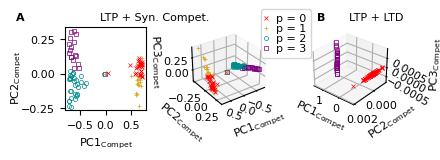

In [6]:

colors = ["black", "red", "#Daa520", "#Daa520", "green", "#008b8b", "purple", "purple", "#ff00ff"]
symbols = [".","x", "+", "+", ".", "o", "s", "s", "o"]

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

papersize=(4.33, 1.452)
fig = plt.figure(figsize=papersize)

ax0 = fig.add_subplot(1, 3, 1)
ax0.text(-0.6,1.05, "A", va="bottom", weight="bold", transform=ax0.transAxes, fontsize=8)
ax0.text(1.1,1.05, "LTP + Syn. Compet.", va="bottom", ha="center", transform=ax0.transAxes, fontsize=8)
ax0.text(3.1,1.05, "B", va="bottom", weight="bold", transform=ax0.transAxes, fontsize=8)
ax0.text(3.5,1.05, "LTP + LTD", va="bottom", ha="left", transform=ax0.transAxes, fontsize=8)
ax0.set_xlabel("$PC1_{Compet}$", fontsize=8)
ax0.set_ylabel("$PC2_{Compet}$", fontsize=8)
ax0.yaxis.set_label_coords(-0.5,0.4)
ax0.tick_params(labelsize=8)
for idx in range(100):
    ax0.plot(w_SC_pca[idx, 0], w_SC_pca[idx,1], symbols[np.argsort(w_SC, axis=1)[idx,-2]], ms=3, markeredgewidth=0.5,
             c=colors[np.argsort(w_SC, axis=1)[idx,-2]], markerfacecolor='none')
    
ax2 = fig.add_subplot(1,3,2, projection="3d", zorder=-1)

ax2.set_xlabel("$PC1_{Compet}$", fontsize=8, labelpad=-6)
ax2.set_ylabel("$PC2_{Compet}$", fontsize=8, labelpad=-3)
ax2.set_zlabel("$PC3_{Compet}$", fontsize=8, labelpad=-5)
ax2.xaxis.set_tick_params(labelrotation=-20)
ax2.tick_params(labelsize=8, pad=-1)
ax2.xaxis.set_tick_params(pad=-5)
for idx in range(100):
    ax2.plot(w_SC_pca[idx, 0], w_SC_pca[idx,1], w_SC_pca[idx,2], symbols[np.argsort(w_SC, axis=1)[idx,-2]], ms=3, markeredgewidth=0.5,
             c=colors[np.argsort(w_SC, axis=1)[idx,-2]], markerfacecolor='none')
ax2.view_init(elev=30., azim=55)

ax3 = fig.add_subplot(1,3,3, projection="3d", zorder=-1)

ax3.set_xlabel("$PC1_{Compet}$", fontsize=8, labelpad=-10)
ax3.set_ylabel("$PC2_{Compet}$", fontsize=8, labelpad=-5)
ax3.set_zlabel("$PC3_{Compet}$", fontsize=8, labelpad=0)
ax3.tick_params(labelsize=8, pad=-1)
ax3.zaxis.set_tick_params(pad=1)
ax3.yaxis.set_tick_params(pad=-2.5)
ax3.xaxis.set_tick_params(pad=-5)
ax3.zaxis.set_tick_params(labelrotation=-30)

for idx in range(100):
    ax3.plot(w_LTD_pca[idx, 0], w_LTD_pca[idx,1], w_LTD_pca[idx,2], symbols[np.argsort(w_LTD, axis=1)[idx,-2]], ms=3,  markeredgewidth=0.5,
             c=colors[np.argsort(w_LTD, axis=1)[idx,-2]], markerfacecolor='none')
ax3.view_init(elev=30., azim=-230)

plt.subplots_adjust(left=0.125,
                    bottom=0.275, 
                    right=0.875, 
                    top=0.85, 
                    wspace=0.5, 
                    hspace=0)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker=symbols[1], ms=3, lw=0, markeredgewidth=0.5, color=colors[1], label="p = 0", markerfacecolor='none'),
    Line2D([0], [0], marker=symbols[3], ms=3, lw=0, markeredgewidth=0.5, color=colors[3], label='p = 1', markerfacecolor='none'),
    Line2D([0], [0], marker=symbols[5], ms=3, lw=0, markeredgewidth=0.5, color=colors[5], label='p = 2', markerfacecolor='none'),
    Line2D([0], [0], marker=symbols[6], ms=3, lw=0, markeredgewidth=0.5, color=colors[6], label='p = 3', markerfacecolor='none')
]
ax3.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(.1, 1.3), fontsize=8, 
           borderpad=0.4, labelspacing=0, handlelength=0.2)

fig.savefig("Fig02_1top.pdf")

In [7]:
# Generating activation for comparisons

x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])

x_in = x 
x_in = 0.5*(x_in + np.absolute(x_in))

y_SC_in = np.matmul(w_SC, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_SC_in.shape), 0)

y_SC = y_of_x(y_SC_in+noise).transpose()

y_LTD_in = np.matmul(w_LTD, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_LTD_in.shape), 0)

y_LTD = y_of_x(y_LTD_in+noise).transpose()

y_LTP_in = np.matmul(w_LTP, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_LTP_in.shape), 0)

y_LTP = y_of_x(y_LTP_in+noise).transpose()

In [8]:
pca_fit_y_SC = PCA(5)
pca_fit_y_SC.fit(y_SC)
y_SC_pca= pca_fit_y_SC.transform(y_SC)
y_LTD_pca= pca_fit_y_SC.transform(y_LTD)
y_LTP_pca= pca_fit_y_SC.transform(y_LTP)

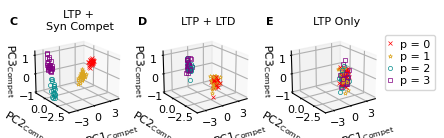

In [9]:
papersize=(4.33, 1.443)

colors2 = ["black", "red", "orange", "green", "purple", "blue", "#008b8b", "#ff00ff"]
symbols = [".","*", "x", "^", "x", "o", "o", "o", "o"]


colors2 = ["red", "#Daa520", "#008b8b", "purple"]
symbols = ["x", "*", "o", "s"]

fig = plt.figure(figsize=papersize)

ax0 = fig.add_subplot(1,3,1, projection="3d")
ax0.text2D(-0.2,1.05,"C",weight="bold",transform=ax0.transAxes,fontsize=8)
ax0.text2D(0.55,1,"LTP + \nSyn Compet",transform=ax0.transAxes,fontsize=8,ha="center")
ax0.set_xlabel("$PC1_{Compet}$", fontsize=8)
ax0.set_ylabel("$PC2_{Compet}$", fontsize=8)
ax0.set_zlabel("$PC3_{Compet}$", fontsize=8)

for idx in range(100):
    ax0.plot(y_SC_pca[idx, 0], y_SC_pca[idx,1], y_SC_pca[idx,2], symbols[labels4train[idx]],  ms=3, markeredgewidth=0.5,
             c=colors2[labels4train[idx]], markerfacecolor='none')

ax1 = fig.add_subplot(1,3,2, projection="3d")
ax1.text2D(-0.2,1.05,"D",weight="bold",transform=ax1.transAxes,fontsize=8)
ax1.text2D(0.55,1.05,"LTP + LTD",transform=ax1.transAxes,fontsize=8,ha="center")
ax1.set_xlabel("$PC1_{Compet}$", fontsize=8)
ax1.set_ylabel("$PC2_{Compet}$", fontsize=8)
ax1.set_zlabel("$PC3_{Compet}$", fontsize=8)

for idx in range(100):
    ax1.plot(y_LTD_pca[idx, 0], y_LTD_pca[idx,1], y_LTD_pca[idx,2], symbols[labels4train[idx]],  ms=3, markeredgewidth=0.5,
             c=colors2[labels4train[idx]], markerfacecolor='none')

ax2 = fig.add_subplot(1,3,3, projection="3d")
ax2.text2D(-0.2,1.05,"E",weight="bold",transform=ax2.transAxes,fontsize=8)
ax2.text2D(0.55,1.05,"LTP Only",transform=ax2.transAxes,fontsize=8,ha="center")
ax2.set_xlabel("$PC1_{Compet}$", fontsize=8)
ax2.set_ylabel("$PC2_{Compet}$", fontsize=8)
ax2.set_zlabel("$PC3_{Compet}$", fontsize=8)

for idx in range(100):
    ax2.plot(y_LTP_pca[idx, 0], y_LTP_pca[idx,1], y_LTP_pca[idx,2], symbols[labels4train[idx]],  ms=3, markeredgewidth=0.5,
             c=colors2[labels4train[idx]], markerfacecolor='none')

xlim=[0,0]
ylim=[0,0]
zlim=[0,0]



for ax in [ax0, ax1, ax2]:
    xlim = [np.minimum(xlim[0], ax.get_xlim()[0]), np.maximum(xlim[1], ax.get_xlim()[1])]
    ylim = [np.minimum(ylim[0], ax.get_ylim()[0]), np.maximum(ylim[1], ax.get_ylim()[1])]
    zlim = [np.minimum(zlim[0], ax.get_zlim()[0]), np.maximum(zlim[1], ax.get_zlim()[1])]
    ax.view_init(elev=20., azim=-125)
    ax.tick_params(axis='both', which='major', pad=-4)
    ax.xaxis.labelpad = -5
    ax.yaxis.labelpad = -5
    ax.zaxis.labelpad = -10
    ax.xaxis.set_ticks([-3,0,3])
    ax.tick_params(labelsize=8)

ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
ax0.set_zlim(zlim)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_zlim(zlim)
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_zlim(zlim)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker=symbols[0], lw=0, ms=3, markeredgewidth=0.5, color=colors2[0], label='p = 0', markerfacecolor='none'),
    Line2D([0], [0], marker=symbols[1], lw=0, ms=3, markeredgewidth=0.5, color=colors2[1], label='p = 1', markerfacecolor='none'),
    Line2D([0], [0], marker=symbols[2], lw=0, ms=3, markeredgewidth=0.5, color=colors2[2], label='p = 2', markerfacecolor='none'),
    Line2D([0], [0], marker=symbols[3], lw=0, ms=3, markeredgewidth=0.5, color=colors2[3], label='p = 3', markerfacecolor='none')
]
ax2.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8, 
           borderpad=0.4, labelspacing=0.2, handlelength=0.2)


plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.87, 
                    top=0.85, 
                    wspace=0.3, 
                    hspace=0.35)

fig.savefig("Fig02_2mid.pdf")

In [10]:
# Training Weights without mature nor competition

np.random.seed(1)
w_noMature = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_noMature = update_w(x, w_noMature, limit=True, ltd=False, mature=False)
    

np.random.seed(1)
w_noCompet = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_noCompet = update_w(x, w_noCompet, limit=True, ltd=False, compet=False)

In [11]:
# Neuronal activation without mature nor competition

y_noMature_in = np.matmul(w_noMature, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_noMature_in.shape), 0)

y_noMature = y_of_x(y_noMature_in+noise).transpose()

y_noCompet_in = np.matmul(w_noCompet, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_noCompet_in.shape), 0)

y_noCompet = y_of_x(y_noCompet_in+noise).transpose()

In [12]:
# Calculating the corresponding PCA

y_noMature_pca= pca_fit_y_SC.transform(y_noMature)
y_noCompet_pca= pca_fit_y_SC.transform(y_noCompet)

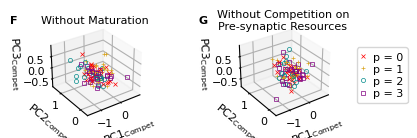

In [13]:
papersize=(4.33, 1.44)

colors2 = ["black", "red", "orange", "green", "#008b8b", "blue", "purple", "#ff00ff"]
symbols = [".","+", "x", "^", "x", "o", "o", "o", "o"]

colors2 = ["black", "red", "orange", "green", "purple", "blue", "#008b8b", "#ff00ff"]
symbols = [".","+", "x", "^", "x", "o", "o", "o", "o"]

colors2 = ["red", "#Daa520", "#008b8b", "purple"]
symbols = ["x", "+", "o", "s"]

fig = plt.figure(figsize=papersize)

ax1 = fig.add_subplot(1,2,1, projection="3d")
ax1.text2D(-0.35,1.02,"F",weight="bold",transform=ax1.transAxes,fontsize=8,va="center")
ax1.text2D(0.5,1.02,"Without Maturation",transform=ax1.transAxes,fontsize=8,ha="center",va="center")
ax1.set_xlabel("$PC1_{Compet}$", fontsize=8)
ax1.set_ylabel("$PC2_{Compet}$", fontsize=8)
ax1.set_zlabel("$PC3_{Compet}$", fontsize=8)

for idx in range(100):
    ax1.plot(y_noMature_pca[idx, 0], y_noMature_pca[idx,1], y_noMature_pca[idx,2], symbols[labels4train[idx]], ms=3, markeredgewidth=0.5, 
             c=colors2[labels4train[idx]], markerfacecolor='none')

ax2 = fig.add_subplot(1,2,2, projection="3d")
ax2.text2D(-0.35,1.02,"G",weight="bold",transform=ax2.transAxes,fontsize=8,va="center")
ax2.text2D(0.5,1.02,"Without Competition on\nPre-synaptic Resources",transform=ax2.transAxes,fontsize=8,ha="center",va="center")
ax2.set_xlabel("$PC1_{Compet}$", fontsize=8)
ax2.set_ylabel("$PC2_{Compet}$", fontsize=8)
ax2.set_zlabel("$PC3_{Compet}$", fontsize=8)

for idx in range(100):
    ax2.plot(y_noCompet_pca[idx, 0], y_noCompet_pca[idx,1], y_noCompet_pca[idx,2], symbols[labels4train[idx]], ms=3, markeredgewidth=0.5, 
             c=colors2[labels4train[idx]], markerfacecolor='none')

xlim=[0,0]
ylim=[0,0]
zlim=[0,0]

for ax in [ax1, ax2]:
    xlim = [np.minimum(xlim[0], ax.get_xlim()[0]), np.maximum(xlim[1], ax.get_xlim()[1])]
    ylim = [np.minimum(ylim[0], ax.get_ylim()[0]), np.maximum(ylim[1], ax.get_ylim()[1])]
    zlim = [np.minimum(zlim[0], ax.get_zlim()[0]), np.maximum(zlim[1], ax.get_zlim()[1])]
    ax.tick_params(axis='x', which='major', pad=-4,labelsize=8)
    ax.tick_params(axis='y', which='major', pad=-4,labelsize=8)
    ax.tick_params(axis='z', which='major', pad=-1,labelsize=8)
    ax.xaxis.labelpad = -7
    ax.yaxis.labelpad = -7
    ax.zaxis.labelpad = -5
    ax.set_yticks([0,1])

for ax in [ax1, ax2]:
    ax.view_init(elev=30., azim=235)

for ax in [ax1, ax2]:
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker=symbols[0], lw=0, color=colors2[0], ms=3, markeredgewidth=0.5, label='p = 0', markerfacecolor='none'),
    Line2D([0], [0], marker=symbols[1], lw=0, color=colors2[1], ms=3, markeredgewidth=0.5, label='p = 1', markerfacecolor='none'),
    Line2D([0], [0], marker=symbols[2], lw=0, color=colors2[2], ms=3, markeredgewidth=0.5, label='p = 2', markerfacecolor='none'),
    Line2D([0], [0], marker=symbols[3], lw=0, color=colors2[3], ms=3, markeredgewidth=0.5, label='p = 3', markerfacecolor='none')
]
ax2.legend(handles=legend_elements, loc='upper center', ncol =1, bbox_to_anchor=(1.5, 0.8), fontsize=8, 
           borderpad=0.4, labelspacing=0.2, handlelength=0.2)

#fig.tight_layout()

plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.89, 
                    wspace=0.05, 
                    hspace=0.15)


fig.savefig("Fig02_3low.pdf")